# PREDICTING CUSTOMER CHURN FOR SyriaTel


# Problem Statement
The business problem at hand is the need to predict customer churn accurately. By identifying potential churners early on, SyriaTel can implement targeted strategies to retain customers, such as offering incentives, personalized promotions, or improved customer service. This proactive approach can significantly impact customer retention rates and, consequently, the overall financial health of the company.


# Business Understanding

The primary stakeholder for this project is SyriaTel, a telecommunications company. SyriaTel is interested in understanding and predicting customer churn, which refers to the phenomenon where customers discontinue their services with the company. This is a critical concern for SyriaTel, as retaining customers is crucial for sustaining revenue and ensuring long-term business success.

# Data Understanding

Classification is a suitable approach for this problem context due to the nature of the target variable, which is 'churn.' Churn is typically a binary outcome – a customer either churns (1) or does not churn (0). Therefore, the problem naturally fits into the framework of binary classification, where the goal is to categorize customers into two classes based on certain features.

The objective is to build a predictive model that can classify customers as potential churners or non-churners. This model will be trained on historical data, leveraging patterns and relationships between various customer-related features and the likelihood of churn. Classification algorithms, such as logistic regression, decision trees, or support vector machines, are well-suited for this task as they are designed to handle binary outcomes and can provide probability estimates for each class.

By employing classification techniques, SyriaTel can make informed and timely decisions to implement retention strategies, ultimately reducing customer churn and fostering long-term customer relationships. This predictive approach aligns with modern data-driven business practices, allowing SyriaTel to be proactive in addressing customer satisfaction and loyalty.

In [622]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE, RFECV

#import warnings

3. Data Preparation
Handle Missing Data: Address any missing values in the dataset.
Deal with Non-numeric Data: Convert categorical data into numeric format.
Prevent Data Leakage: Ensure proper separation of training and testing data.
Scale Data (if applicable): If using distance-based models, scale the data.
Feature Engineering (optional): Create new features if needed.

# Exploratory Data Analysis

In [623]:
# Load the dataset
df = pd.read_csv("SyriaTel.csv")

In [624]:
# Explore the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [625]:
df.groupby(['churn']).mean() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [626]:
df.groupby(['churn']).describe() 

account length                                                        \
               count        mean       std  min   25%    50%    75%    max   
churn                                                                        
False         2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0   
True           483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0   

      area code              ... total intl charge       \
          count        mean  ...               75%  max   
churn                        ...                          
False    2850.0  437.074737  ...              3.24  5.1   
True      483.0  437.817805  ...              3.46  5.4   

      customer service calls                                               
                       count      mean       std  min  25%  50%  75%  max  
churn                                                                      
False                 2850.0  1.449825  1.163883  0.0  1.0  1.0  2.0  8.0  
True                   483.0  2.229814  1.853275  0.0  1.0  2.0  4.0  9.0  

[2 rows x 128 columns]

In [627]:
# look for columns to with high number of unique values to consider for dropping
for value in df.columns:
    print(value, df[value].nunique(), len(df))

state 51 3333
account length 212 3333
area code 3 3333
phone number 3333 3333
international plan 2 3333
voice mail plan 2 3333
number vmail messages 46 3333
total day minutes 1667 3333
total day calls 119 3333
total day charge 1667 3333
total eve minutes 1611 3333
total eve calls 123 3333
total eve charge 1440 3333
total night minutes 1591 3333
total night calls 120 3333
total night charge 933 3333
total intl minutes 162 3333
total intl calls 21 3333
total intl charge 162 3333
customer service calls 10 3333
churn 2 3333


In [628]:
# Drop non-predictive columns
df = df.drop(['state', 'phone number'], axis=1)

In [629]:
# correlation matrix
df_copy = df.copy()
corr_matrix = df_copy.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,NaN,0.012463,0.004628,0.006216,0.038470,0.006214,0.006757,0.019260,0.006745,0.008955,0.013176,0.008960,0.009514,0.020661,0.009546,0.003796,0.016541
area code,NaN,NaN,0.001994,0.008264,0.009646,0.008264,0.003580,0.011886,0.003607,0.005825,0.016522,0.005845,0.018288,0.024179,0.018395,0.027572,0.006174
number vmail messages,NaN,NaN,NaN,0.000778,0.009548,0.000776,0.017562,0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,0.013263,0.089728
total day minutes,NaN,NaN,NaN,NaN,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,0.010155,0.008033,0.010092,0.013423,0.205151
total day calls,NaN,NaN,NaN,NaN,NaN,0.006753,0.021451,0.006462,0.021449,0.022938,0.019557,0.022927,0.021565,0.004574,0.021666,0.018942,0.018459
total day charge,NaN,NaN,NaN,NaN,NaN,NaN,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,0.010157,0.008032,0.010094,0.013427,0.205151
total eve minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011430,1.000000,0.012584,0.007586,0.012593,0.011035,0.002541,0.011067,0.012985,0.092796
total eve calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011423,0.002093,0.007710,0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012592,0.007596,0.012601,0.011043,0.002541,0.011074,0.012987,0.092786
total night minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011204,0.999999,0.015207,0.012353,0.015180,0.009288,0.035493


This shows perfect correlation between minutes and charge for four categories: total day charge/minutes, total night charge/minutes, total eve charge/minutes and total intl charge/minutes.
So we deop the four minutes columns.

In [630]:
df = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])

In [631]:
df.columns.values

array(['account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype=object)

In [632]:
# Checking the data types of all the columns
df.dtypes

account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [633]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

# Convert boolean churn column to 0 and 1
df['churn'] = df['churn'].astype(int)

In [634]:
# Checking the data types of all the columns
df.dtypes

account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

In [635]:
# Check for missing values
df.isnull().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [636]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [637]:
# Calculate the correlation matrix in relation to churn variable
correlation_matrix = df.corr()

# Extract correlations with the 'churn' column
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

# Display the correlations
print(churn_correlations)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day charge          0.205151
total eve charge          0.092786
total intl charge         0.068259
total night charge        0.035496
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


International plan, customer service calls and total day charge seem to have the highest positive correlation with churn.

Total intl calls, number vmail messages and voicemail plan have the only negative correlation with churn.

# Scaling, splitting and training the data

In [638]:
# Assign 'churn' to y and drop it from the dataframe
X = df.drop('churn', axis=1)  
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

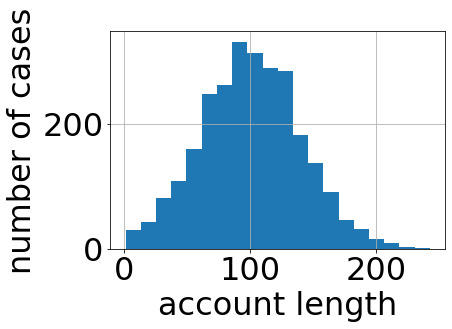

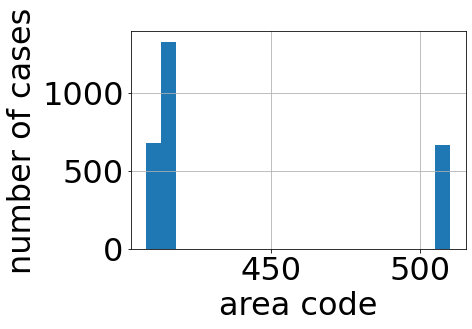

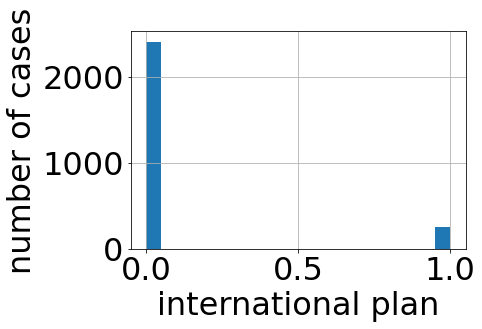

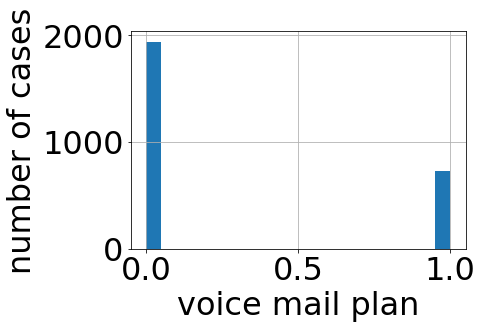

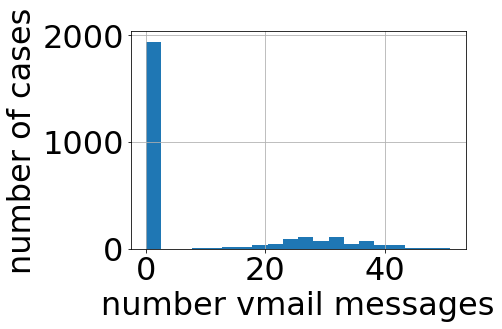

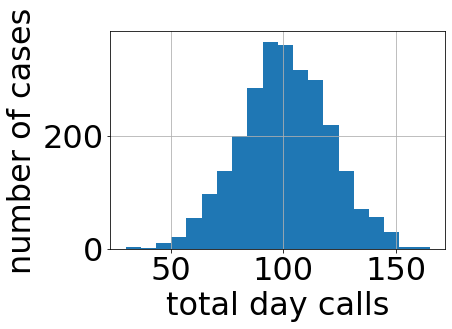

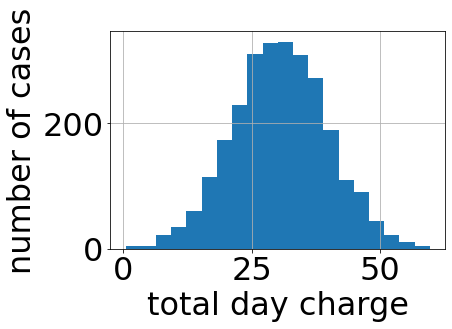

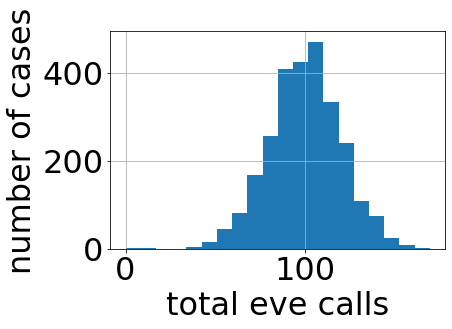

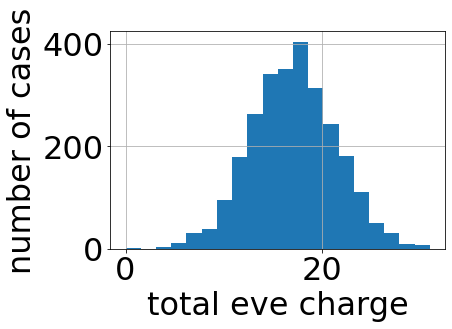

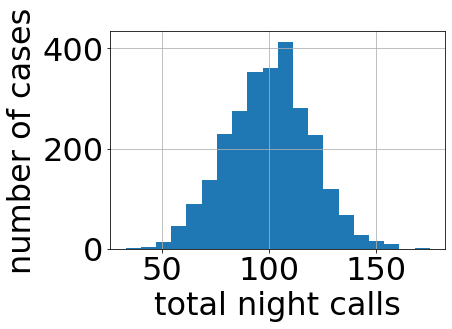

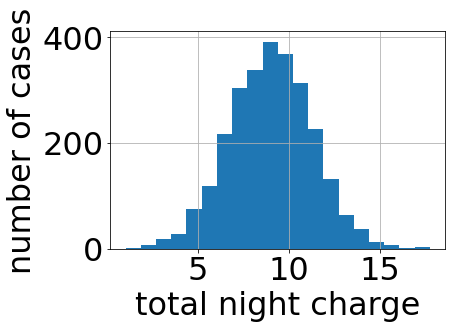

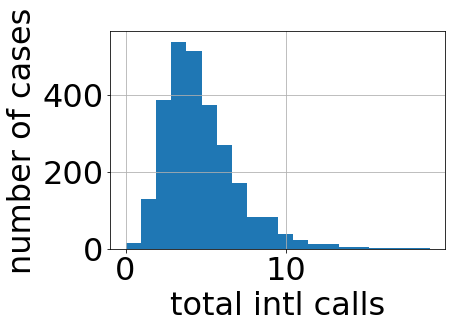

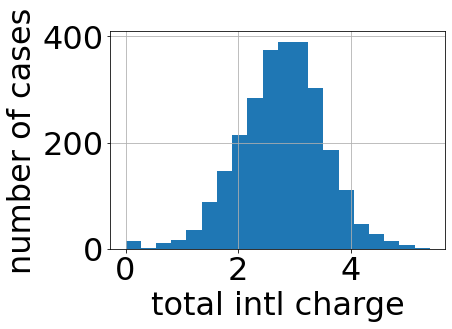

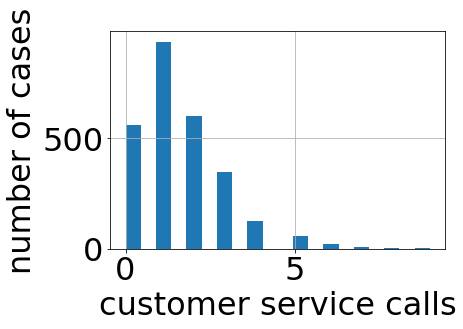

In [639]:
# Check the distribution curve for each feature
X.reset_index(drop=True, inplace=True)

for feat in X:    
    fig = X_train[feat].hist(bins=20)
    fig.set_ylabel('number of cases')
    fig.set_xlabel(feat)
    plt.show()

In [640]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_train_scaled_df.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,3.601382,1.735840,-0.326624,-0.611162,-0.584936,-0.429657,-1.547170,-1.840891,-0.731087,0.925634,1.256197,0.634849,-1.304132,0.318978
1,0.184951,-0.517168,-0.326624,-0.611162,-0.584936,0.224176,-1.244071,0.499864,-0.139179,-0.353704,0.164841,-0.184370,-2.191525,1.813519
2,-0.650176,-0.517168,3.061624,-0.611162,-0.584936,-1.133785,0.787772,0.549667,2.493068,0.209205,0.147309,1.863677,-0.549186,-0.428293
3,1.020079,-0.517168,-0.326624,-0.611162,-0.584936,-0.127888,-0.970200,-1.890695,-0.408439,1.437368,-1.176344,-1.003589,-0.800835,-0.428293
4,-0.371801,1.735840,-0.326624,-0.611162,-0.584936,-0.228477,0.675192,-1.143645,1.295326,0.516246,0.265649,-0.593980,-2.045833,-1.175564


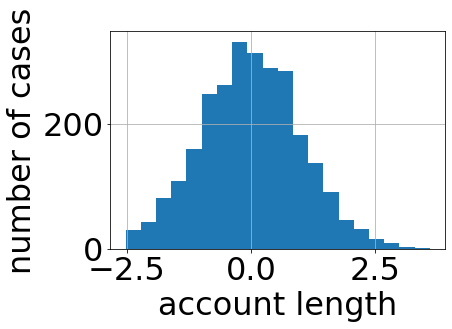

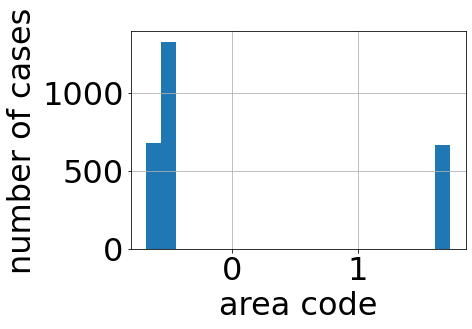

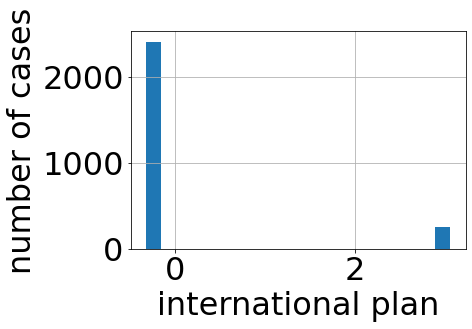

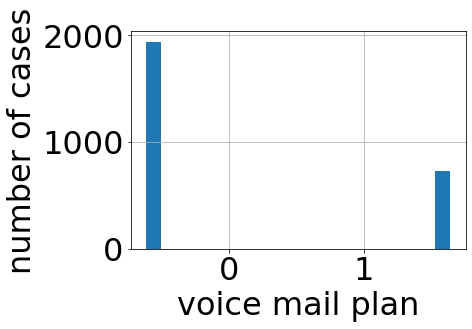

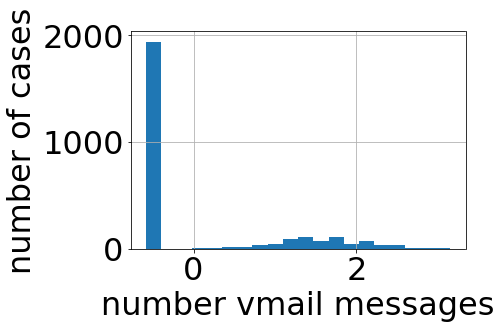

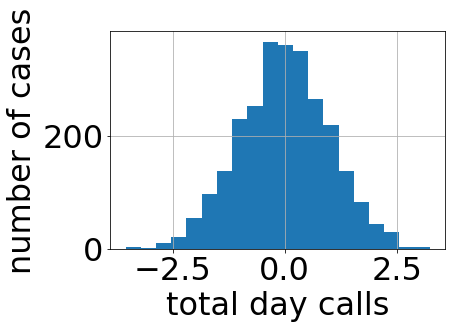

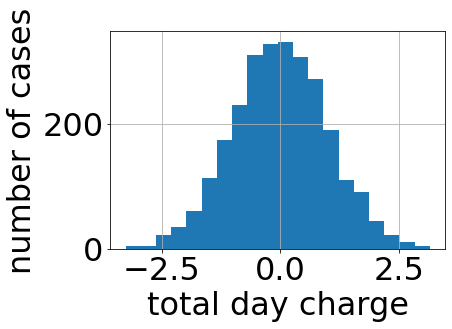

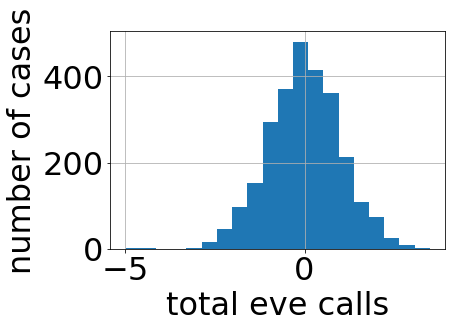

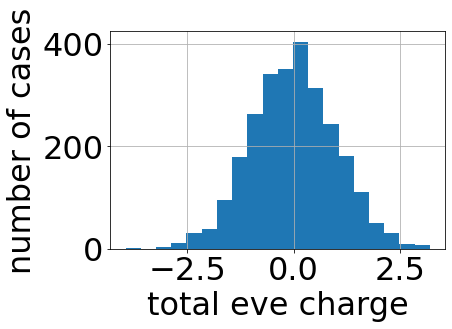

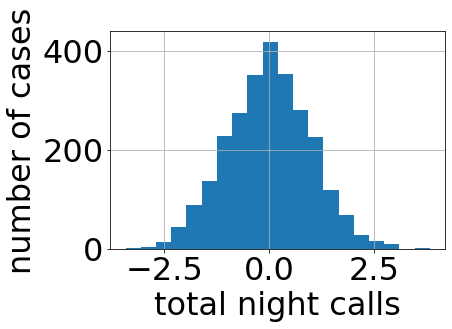

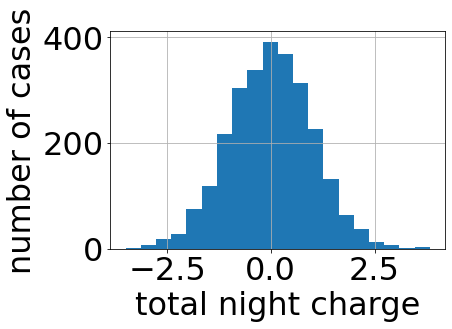

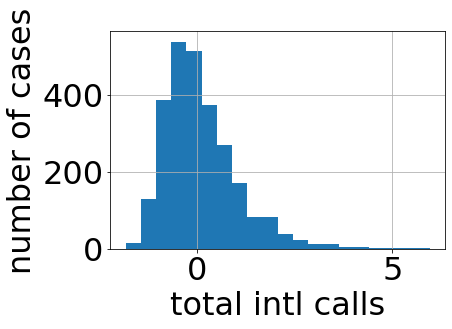

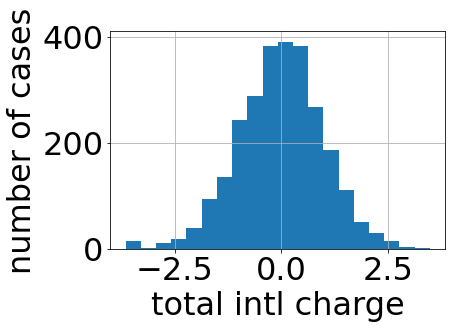

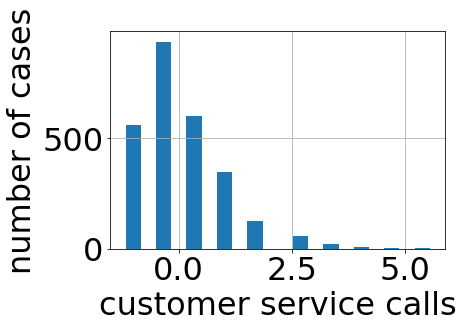

In [641]:
# Check the distribution curve for each feature

for feat in X:    
    fig = X_train_scaled_df[feat].hist(bins=20)
    fig.set_ylabel('number of cases')
    fig.set_xlabel(feat)
    plt.show()

## Building Models



# 1. Logistic Regression


Logistic Regression Metrics:
Accuracy: 0.8515742128935532
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.75      0.03      0.06       101

    accuracy                           0.85       667
   macro avg       0.80      0.51      0.49       667
weighted avg       0.84      0.85      0.79       667



c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


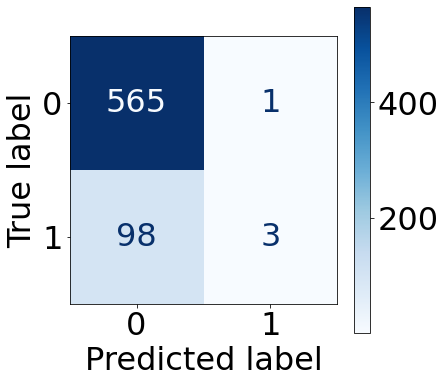

In [642]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))



fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(log_reg_model, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)


# 2. Random Forest



Random Forest Metrics:
Accuracy: 0.9340329835082459
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.94      0.60      0.73       101

    accuracy                           0.93       667
   macro avg       0.94      0.80      0.85       667
weighted avg       0.93      0.93      0.93       667



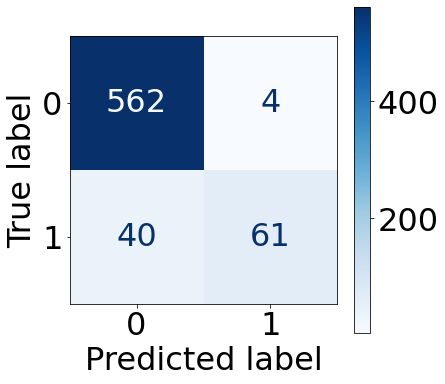

In [643]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)


# 3. Support Vector Machine (SVM)


In [644]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 3
F1-Score: 0.2535211267605634



Support Vector Machine Metrics:
Accuracy: 0.848575712143928
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


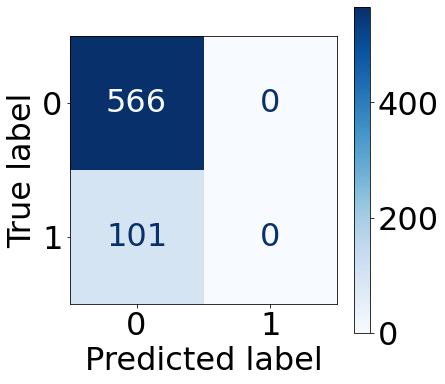

In [645]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSupport Vector Machine Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)


# 4. K-Nearest Neighbors (KNN)



K-Nearest Neighbors Metrics:
Accuracy: 0.8545727136431784
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.62      0.10      0.17       101

    accuracy                           0.85       667
   macro avg       0.74      0.54      0.55       667
weighted avg       0.82      0.85      0.81       667



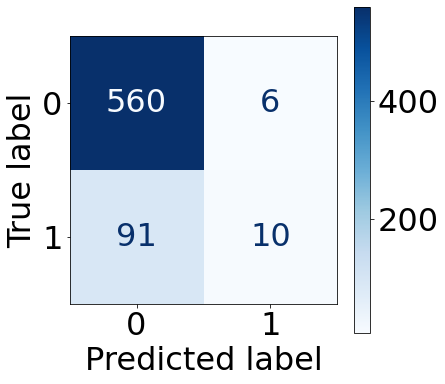

In [646]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(knn_model, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)


# 5. Decision Tree



Decision Tree Metrics:
Accuracy: 0.9100449775112444
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.70      0.71      0.71       101

    accuracy                           0.91       667
   macro avg       0.82      0.83      0.83       667
weighted avg       0.91      0.91      0.91       667



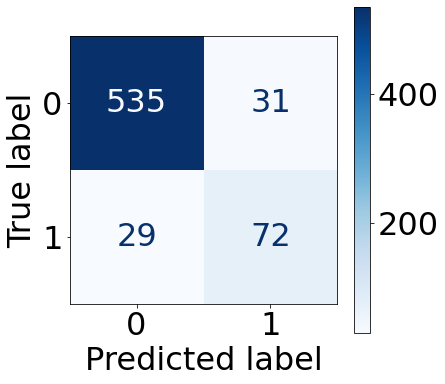

In [647]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(dt_model, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)

# Gradient Boost

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.72      0.82       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



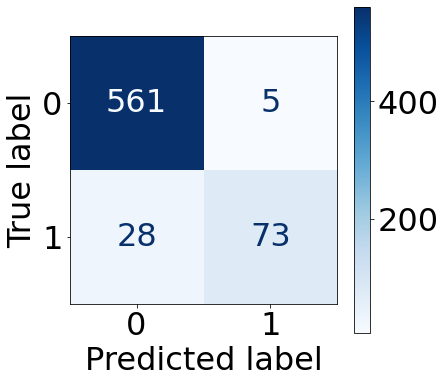

In [648]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
y_preds = classifier.predict(X_test)
report = classification_report(y_test, y_preds)
print(report)

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)

# XGBoost

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.91      0.76      0.83       101

    accuracy                           0.95       667
   macro avg       0.93      0.87      0.90       667
weighted avg       0.95      0.95      0.95       667



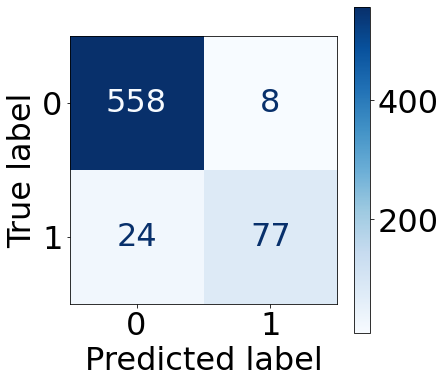

In [649]:
import xgboost as xgb

classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)
y_preds = classifier.predict(X_test)
report = classification_report(y_test, y_preds)
print(report)

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)

In [650]:

training_preds = classifier.predict(X_train)

training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, y_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 95.2%


In [651]:
param_grid = {
    "learning_rate": [0.1, 0.2, 0.3],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [5, 10, 15],
    'subsample': [ 0.5, 0.7, 0.9],
    'n_estimators': [5, 50, 100, 250],
}

grid_clf = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 9
min_child_weight: 5
n_estimators: 100
subsample: 0.9

Training Accuracy: 97.9%
Validation accuracy: 94.75%


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.92      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



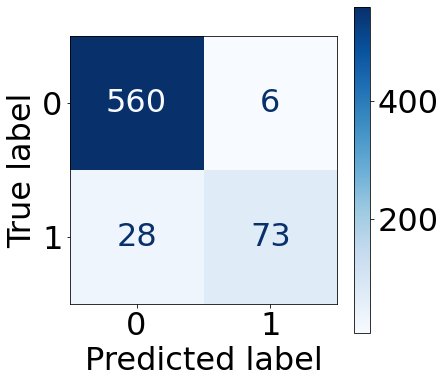

In [652]:
classifier = xgb.XGBClassifier(learning_rate= 0.1,
    max_depth= 9,
    min_child_weight= 5,
    subsample=0.9,
    n_estimators=50)
classifier.fit(X_train, y_train)
y_preds = classifier.predict(X_test)
report = classification_report(y_test, y_preds)
print(report)

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 32})
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             cmap=plt.cm.Blues,
                             ax=ax)

# Evaluate Models


In [653]:
models = ['log_reg_model','Random Forest', 'svm_model', 'knn_model', 'dt_model']
predictions = [y_pred_log_reg, y_pred_rf, y_pred_svm, y_pred_knn, y_pred_dt]

# 1. Confusion Matrix Comparison


ValueError: num must be 1 <= num <= 4, not 5

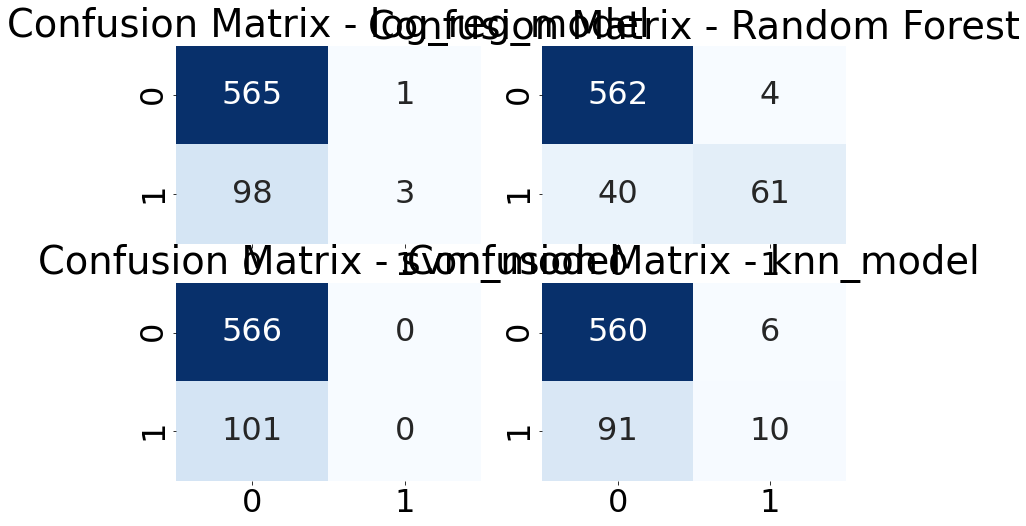

In [654]:
plt.figure(figsize=(12, 8))
for i in range(len(models)):
    plt.subplot(2, 2, i+1)
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {models[i]}')

plt.tight_layout()
plt.show()

# 2. ROC Curve Comparison


In [ ]:
plt.figure(figsize=(8, 6))
for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(y_test, predictions[i].predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{models[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# 3. Feature Importance Comparison


In [ ]:
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    if 'Random Forest' in models[i]:  
        feature_importances = pd.Series(models[i].feature_importances_, index=X.columns)
        feature_importances.nlargest(10).plot(kind='barh', label=models[i])

plt.title('Top 10 Feature Importance Comparison - Random Forest')
plt.legend()
plt.show()

# 4. Precision-Recall Curve Comparison


In [ ]:
plt.figure(figsize=(8, 6))
for i in range(len(models)):
    precision, recall, _ = precision_recall_curve(y_test, predictions[i].predict_proba(X_test)[:,1])
    plt.plot(recall, precision, label=models[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

# 5. Model Comparison - Accuracy


In [ ]:
accuracies = [accuracy_score(y_test, pred) for pred in predictions]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

In [ ]:

# Save the model
import joblib
joblib.dump(classifier, 'churn_classifier_model.pkl')
